## Probability Fundamentals 
### 3 Fundamental Axioms
1. **Non-negativity**  
   For any event \( A \), the probability is non-negative:  
   $$
   P(A) \geq 0
   $$

2. **Normalization**  
   The sum of the probabilities of all possible outcomes in the sample space is 1:  
   $$
   P(\Omega) = 1
   $$

3. **Multiplicativity (Independence)**  
   For any two **independent** events \( A \) and \( B \), the joint probability is the product of the probability of each:  
   $$
   P(A \cap B) = P(A) \cdot P(B)
   $$

---

### 1.1 Sample Space, Event Space, and Events

- **Sample space**: $\Omega$ ("Omega") The set of all possible outcomes of a random experiment.
- **Event**: A specific outcome or a collection of outcomes. An event is denoted by $\omega$
- **Event space**: A set of events (subsets of  $\Omega$ ) we can assign probabilities to.


---

### Sample Space Examples

#### (1) Financial Returns Over Time

- Suppose we are modeling the returns of a financial instrument (or portfolio) over time ($\theta$).
- The sample space could be the set of all real-valued returns:  
  $$
  \Omega = \mathbb{R}
  $$
- But in practice, losses are truncated at –100%, so:  
  $$
  \Omega = \{ x \in \mathbb{R} \mid x \geq -1.0 \}
  $$  
  or simply:  
  $$
  \Omega = [-1.0, \infty)
  $$

#### (2) Dice Roll Outcome

- A fair 6-sided die has the sample space:  
  $$
  \Omega = \{1, 2, 3, 4, 5, 6\}
  $$
- This can also be described as a subset of the natural numbers:  
  $$
  \Omega = \{ x \in \mathbb{N} \mid 1 \leq x \leq 6 \}
  $$


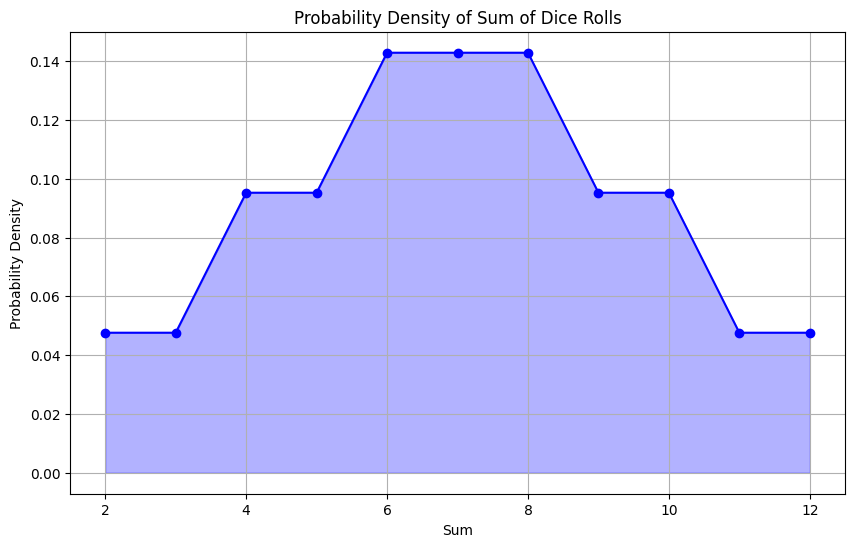

Total outcomes: 21
Unique possible sums / Event Space length: 11
[1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 1]


In [65]:
from itertools import product, combinations_with_replacement
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

single_roll_event_space = [1, 2, 3, 4, 5, 6]
number_of_rolls = 2 #densitystarts as a uniform straight line (if the dice is fair...) and converges towars normal distributaion due to CLT
#https://www.youtube.com/watch?v=zeJD6dqJ5lo&t=375s  <- huge recommend
enable_prints:bool = 0 

order_matter = False  # Toggle this: True if dice order matters (e.g. colored dice), False if not

def calculate_event_space(single_roll_event_space, number_of_rolls, order_matter):
    if order_matter:
        # Dice are distinguishable: (1,2) is not the same as (2,1)
        outcomes = list(product(single_roll_event_space, repeat=number_of_rolls))
    else:
        # Dice are indistinguishable: (1,2) == (2,1)
        outcomes = list(combinations_with_replacement(single_roll_event_space, number_of_rolls))
    sums = [sum(outcome) for outcome in outcomes]
    frequency = Counter(sums)
    sorted_sums = sorted(frequency.keys())
    sorted_freq = [frequency[s] for s in sorted_sums]
    return outcomes, sorted_sums, sorted_freq
    
# Usage
outcomes, sums, frequencies = calculate_event_space(single_roll_event_space, number_of_rolls, order_matter)
if enable_plot == 1:
    plot_density(sums, frequencies)
print(f"Total outcomes: {len(outcomes)}")
print(f"Unique possible sums / Event Space length: {len(sums)}")
print(frequencies)

### Event examples

**An event is a set of outcomes, you may think of it as a list of outcomes
fulfilling a criteria (event)**

If there isn't any outcome fulfilling an event, than it's an empty list/set.

If there is only one outome included in the event, than it's called an elementary event. 

In case of a single roll, possible events are: $\omega$ = {1, 2, 3, 4, 5, 6};
while in case of two rolls possible events are: 

In [63]:
printme = 1 #set to 1 to do the print
i = 0
if printme == True:
    for a in range (1, 7):
        for b in range (1, 7):
            i += 1
            summ = a + b
            print("omega_"+str(i)+" = ["+str(a) + "; "+str(b)+"], sum of the rolls is: "+str(summ))

omega_1 = [1; 1], sum of the rolls is: 2
omega_2 = [1; 2], sum of the rolls is: 3
omega_3 = [1; 3], sum of the rolls is: 4
omega_4 = [1; 4], sum of the rolls is: 5
omega_5 = [1; 5], sum of the rolls is: 6
omega_6 = [1; 6], sum of the rolls is: 7
omega_7 = [2; 1], sum of the rolls is: 3
omega_8 = [2; 2], sum of the rolls is: 4
omega_9 = [2; 3], sum of the rolls is: 5
omega_10 = [2; 4], sum of the rolls is: 6
omega_11 = [2; 5], sum of the rolls is: 7
omega_12 = [2; 6], sum of the rolls is: 8
omega_13 = [3; 1], sum of the rolls is: 4
omega_14 = [3; 2], sum of the rolls is: 5
omega_15 = [3; 3], sum of the rolls is: 6
omega_16 = [3; 4], sum of the rolls is: 7
omega_17 = [3; 5], sum of the rolls is: 8
omega_18 = [3; 6], sum of the rolls is: 9
omega_19 = [4; 1], sum of the rolls is: 5
omega_20 = [4; 2], sum of the rolls is: 6
omega_21 = [4; 3], sum of the rolls is: 7
omega_22 = [4; 4], sum of the rolls is: 8
omega_23 = [4; 5], sum of the rolls is: 9
omega_24 = [4; 6], sum of the rolls is: 10


Note, that regarding outcomes of the sum of the dice rolls, multiple events may fulfill the same criteria.

**The event space ( usually denoted by $\mathcal{F}$ ) consists of all possible combinations of outcomes to which probabilities can be assigned to.**

Note that the event space is an abstract concept and separate from any specific application. As an example, suppose that {A}, {B} are the possible outcomes of an excperiment. Without knowing what {A} and {B} mean in practive, one might consider the following events if A and B are boolean:

1. A occurs, B does not. ->[1,0]
2. B occurs, A does not. ->[0,1]
3. Both A and B occur. ->[1,1]
4. Neither occur. -> [0,0]

Above would give an event space composed of 4 elements: $\mathcal{F} = \{A, B, (A, B), Null\}$

Because the event space has a finite number of outcomes, it is called a **discrete probability** space.

A discrete probability space is one that contains eitherer finitely many outcomes (dice roll sums for 10 rolls persay), or countably infinitely many outcomes ( possible outputs are the natural numbers, so $\Omega = \{ x \in \mathbb{N}\}$ )

**In case of discrete probability, event space usually happens to be the same as the sample space, since the two overlaps due to (by definition? IDC) event space is the subsets of the sample space outcomes we assign probabilities to, but in case of continious probability ( think returns ) the two may differ regarding the elements as event space may be constructed of intervals of the sample space.**

Consider the density plot of the sum of rolls in case of (unless you changed number_of_rolls) two rolls. 

$\Omega = {2, 3, ..., 11, 12}$

If there's an event (call it $\omega$) corresponding to sum = 3, which includes the tuple outcomes from the original sample space of ordered pairs of dice results, that map to sum 3
$$
\omega_1 = (1,2) 
$$
$$
\omega_2 = (2,1)
$$

And we can assign probability of event $\mathcal{F}$ as the sum of $w_i$ that fulfill the criteria over the count of outcomes:

$$
\mathcal{F} =  \{(1,2), (2, 1)\}
$$


And probability of the event space when the sum of rolls is 3 is:
$$
P(F) = \sum_{\omega_i \in F} w_i = w_{(1,2)} + w_{(2,1)} = \frac{1}{36} + \frac{1}{36} = \frac{2}{36} = \frac{1}{18}
$$


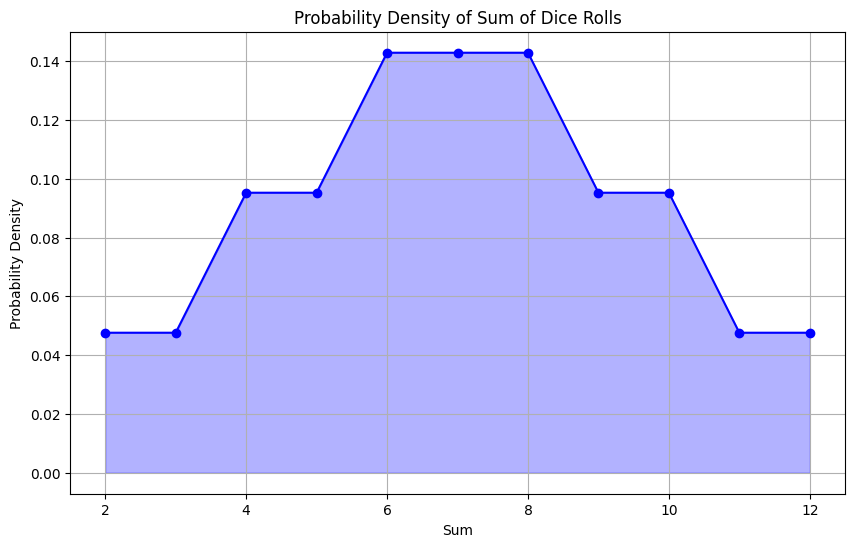

In [68]:
def plot_density(sorted_sums, sorted_freq):
    total = sum(sorted_freq)
    probabilities = np.array(sorted_freq) / total
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_sums, probabilities, marker='o', linestyle='-', color='blue')
    plt.fill_between(sorted_sums, probabilities, color='blue', alpha=0.3)
    plt.title('Probability Density of Sum of Dice Rolls')
    plt.xlabel('Sum')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.show()

plot_density(sums, frequencies)

### Multiplicativity (Independence)

Events are sets, and may contain multiple cases fulfilling the event. For example in case of rolling a dice twice, the event of the sum being odd is fulfilled by the following rolls: {(1,2), (1,4), (1,6), ..., (4,5), (5,6)}
The probability of the event is:

The event of the sum of rolls is greater than or equal to 9 fulfilled by: {(4,5), (4,6), (5,5), (5,6), (6,6)}
The probability of the event is:

Than leverageing the 3rd axiom (Multiplicativity / $P(A \cap B) = P(A) \cdot P(B)$) -> 

In [64]:
def get_matching_outcomes(outcomes, condition_fn):
    """Returns a list of outcomes satisfying a single condition."""
    return [e for e in outcomes if condition_fn(e)]

def get_intersection_outcomes(outcomes, condition_fn_1, condition_fn_2):
    """Returns a list of outcomes that satisfy both conditions."""
    return [e for e in outcomes if condition_fn_1(e) and condition_fn_2(e)]

def compare_event_sets(outcomes, A_fn, B_fn, A_string = 'Condition 1', B_string = 'Condition 2'):
    A_set = get_matching_outcomes(outcomes, A_fn)
    B_set = get_matching_outcomes(outcomes, B_fn)
    A_and_B_set = get_intersection_outcomes(outcomes, A_fn, B_fn)

    print("=== Event A: "+ A_string +" ===")
    print(A_set)
    print(f"Count: {len(A_set)}")
    print()

    print("=== Event B: "+ B_string +" ===")
    print(B_set)
    print(f"Count: {len(B_set)}")
    print()

    print("=== Intersection: A ∩ B ===")
    print(A_and_B_set)
    print(f"Count: {len(A_and_B_set)}")
    print()

    # Optional: Determine if A ∩ B == A × B only by cardinality test (not exact independence)
    expected_len_if_independent = (len(A_set) * len(B_set)) / len(outcomes)
    actual_len = len(A_and_B_set)
    print(len(outcomes))
    print("=== Comparison Summary ===")
    print(f"|A| = {len(A_set)}, |B| = {len(B_set)}, |Ω| = {len(outcomes)}")
    print(len(outcomes))
    print(f"Expected |A ∩ B| if independent: {expected_len_if_independent:.2f} <- {len(A_set)} * {len(B_set)} / {len(outcomes)} ")
    print(f"Actual   |A ∩ B|: {actual_len}")
    print(f"Difference: {actual_len - expected_len_if_independent:.2f}")
    print(f"Implication: {'Looks independent ✅' if round(actual_len, 2) == round(expected_len_if_independent, 2) else 'Likely dependent ❌'}")


# === Define Outcome Space ===

from itertools import product

# Define the sample space (distinguishable dice)
outcomes = list(product(single_roll_event_space, repeat=number_of_rolls))

# === Define Events ===

is_odd_sum = lambda e: sum(e) % 2 != 0           # Event A
sum_gte_9  = lambda e: sum(e) >= 9               # Event B

A_string = 'Sum of rolls is odd'                 # Event A's string
B_string = 'Sum of rolls is >= 9'                # Event B's string

# === Compare Sets ===

compare_event_sets(outcomes, is_odd_sum, sum_gte_9, A_string, B_string)


=== Event A: Sum of rolls is odd ===
[(1, 2), (1, 4), (1, 6), (2, 1), (2, 3), (2, 5), (3, 2), (3, 4), (3, 6), (4, 1), (4, 3), (4, 5), (5, 2), (5, 4), (5, 6), (6, 1), (6, 3), (6, 5)]
Count: 18

=== Event B: Sum of rolls is >= 9 ===
[(3, 6), (4, 5), (4, 6), (5, 4), (5, 5), (5, 6), (6, 3), (6, 4), (6, 5), (6, 6)]
Count: 10

=== Intersection: A ∩ B ===
[(3, 6), (4, 5), (5, 4), (5, 6), (6, 3), (6, 5)]
Count: 6

36
=== Comparison Summary ===
|A| = 18, |B| = 10, |Ω| = 36
36
Expected |A ∩ B| if independent: 5.00 <- 18 * 10 / 36 
Actual   |A ∩ B|: 6
Difference: 1.00
Implication: Likely dependent ❌


In [71]:
# === Utility Functions ===

def event_probability(outcomes, condition_fn):
    return sum(1 for e in outcomes if condition_fn(e)) / len(outcomes)

def intersection_probability(outcomes, condition_fn_1, condition_fn_2):
    return sum(1 for e in outcomes if condition_fn_1(e) and condition_fn_2(e)) / len(outcomes)

def matching_outcomes(outcomes, condition_fn_1, condition_fn_2):
    return [e for e in outcomes if condition_fn_1(e) and condition_fn_2(e)]

def test_independence(outcomes, A_fn, B_fn, verbose=True):
    p_A = event_probability(outcomes, A_fn)
    p_B = event_probability(outcomes, B_fn)
    p_A_and_B = intersection_probability(outcomes, A_fn, B_fn)
    multiplication = p_A * p_B
    if verbose:
        print(f"P(A):              {p_A:.6f}")
        print(f"P(B):              {p_B:.6f}")
        print(f"P(A ∩ B):          {p_A_and_B:.6f}")
        print(f"P(A) × P(B):       {multiplication:.6f}")
        print(f"Difference:        {abs(p_A_and_B - multiplication):.6f}")
        print(f"Independent?       {'Yes' if np.isclose(p_A_and_B, multiplication) else 'No'}")
        #Changing outcomes to use combinations_with_replacement destroys uniformity.
        #Not all sums are equally likely, and number of events with odd sum changes.

    return {
        "P(A)": p_A,
        "P(B)": p_B,
        "P(A ∩ B)": p_A_and_B,
        "P(A) × P(B)": multiplication,
        "Difference": abs(p_A_and_B - multiplication),
        "Independent": np.isclose(p_A_and_B, multiplication),
        "Matching Outcomes": matching_outcomes(outcomes, A_fn, B_fn)
    }

# === Define Events ===
is_odd_sum = lambda e: sum(e) % 2 != 0
sum_gte_9 = lambda e: sum(e) >= 9

# === Event Probabilities ===
p_odd = event_probability(outcomes, is_odd_sum)
p_even = 1 - p_odd  # Alternatively define a separate even condition
print(f"P(odd sum): {p_odd}")
print(f"P(even sum): {p_even}")
print(f"Check P(odd) + P(even) = {p_odd + p_even}")

# === Count P(sum >= 9) via complement ===
p_lt_9 = event_probability(outcomes, lambda e: sum(e) < 9)
p_gte_9 = 1 - p_lt_9
print(f"P(sum ≥ 9): {p_gte_9:.6f}")

# === Use Axiom 3: Multiplicativity Assumption ===
product_p = p_odd * p_gte_9
print(f"P(odd) × P(sum ≥ 9): {product_p:.6f}")

# === Empirical (joint condition) ===
intersect_prob = intersection_probability(outcomes, is_odd_sum, sum_gte_9)
matching = matching_outcomes(outcomes, is_odd_sum, sum_gte_9)

print(f"P(odd ∩ sum ≥ 9): {intersect_prob:.6f}")
print(f"Difference from multiplicativity: {intersect_prob - product_p:.6f}")
print(f"Matching outcomes: {matching}")

# === Independence Test Summary ===
print("\n=== Independence Test ===")
summary = test_independence(outcomes, is_odd_sum, sum_gte_9, verbose=True)

P(odd sum): 0.42857142857142855
P(even sum): 0.5714285714285714
Check P(odd) + P(even) = 1.0
P(sum ≥ 9): 0.285714
P(odd) × P(sum ≥ 9): 0.122449
P(odd ∩ sum ≥ 9): 0.142857
Difference from multiplicativity: 0.020408
Matching outcomes: [(3, 6), (4, 5), (5, 6)]

=== Independence Test ===
P(A):              0.428571
P(B):              0.285714
P(A ∩ B):          0.142857
P(A) × P(B):       0.122449
Difference:        0.020408
Independent?       No


### Probability

Probability measures the likelyhood of of an event. Probabilities are always between 0; and 1. An event with a probability of 1 ($P(\omega) = 1 $) always occurs, an event with a probability of 0 ($P(\omega) = 0 $) never occurs. The simplest interpretation of probabilty is the frequency of an event' occurence in a set of independent experiments. This interpretation of probability is known as the frequentist approach, and focuses on objective probability. Mind you that finance is mostly focused on non experimental events, for example the asset returns.

Events are simply a combination of outcomes, therefore the language of sets can be leveraged to ilustrate some core probability concepts.

Notations:

A "union" B --> $$A \cup B$$: Is the set of outcomes that appear both in $A$ and $B$

A "intersection" B --> $$A \cap B$$: Is the set of outcomes that appear in $A$ and $B$

A "Complement" --> $A^c$: Set of outcomes that are not in $A$

Mutually Exclusive is expressed as: $ A \cap B = none$

### Fundamental principles of Probability

Any event "A" -> $\omega_a$ in the event space ($\mathcal{F}$) has $$ Pr(\omega_a) >= 0$$

Probability of all events in $\Omega$ is 1, and thus $$Pr(\Omega) = 1$$

If the events "$\omega_a$" and "$\omega_b$" are mutually exclusive, then:
$$Pr(\omega_a \cup \omega_b) = Pr(\omega_a) + Pr(\omega_b)$$ 
Since there isn't any overlay across events that fulfill criteria A and events that fulfill criteria B probabilities are additive. It may be expressed as $\omega_a \cap \omega_b = none$

This 3 principles collectively are being known as the [Axioms of Probability](https://en.wikipedia.org/wiki/Probability_axioms), the foundations of probabilty theory.

They imply the following steps: 

1) The probability of any event and it's complement is 1$$Pr(A \cup A^c) = Pr(A) + Pr(A^c) = 1$$
2) The Pr of the union of two sets can be decomposed as:

$$ Pr(A \cup B) = Pr(A) + Pr(B) - Pr(A \cap B)$$


In [98]:
 # so in case of a fair dice:
Pr_1 = 1/6
Pr_2 = 1/6
Pr_3 = 1/6
Pr_4 = 1/6
Pr_5 = 1/6
Pr_6 = 1/6
Pr_i = [1/6,1/6,1/6,1/6,1/6,1/6]
sides = [1,2,3,4,5,6]
# Since there isn't any overlay across sides that fulfill multiple criteria,
print(sum(Pr_i)) #<- Omega basically

even = []
odd = []
for i in sides:
    if i % 2 == 0:
        even.append(i)
    else:
        odd.append(i)
print(even)
print(odd)
n = len(sides)
probability_of_odd = len(odd) / len(sides)
print(probability_of_odd) #frequentist apprach
probability_of_even = 1 - probability_of_odd # Pr(odd)'s complementer
pr_of_greater_than_3 = 3 / n # 3/6 -> 0.5
if pr_of_greater_than_3 * probability_of_even == 1/6:
    print("Event A and B are independent")
else:
    print("Event A and B are dependent to an extent, since A is fulfilled by events [4,5,6] and B is by events [2,4,6]")
A_union_B = [2,4,5,6]
A = [4,5,6]
B = [2,4,6]
A_cap_B = [4,6]

print("Pr( Even U 3<= ) = Pr(Even) + Pr(3<=) - Pr( Even and 3<=")
pr_A_union_B = len(A_union_B) / n
pr_A = len(A) / n
pr_B = len(B) / n
pr_A_cap_B = len(A_cap_B) / n

print(pr_A_union_B)
print(pr_A)
print(pr_B)
print(pr_A_cap_B)

if pr_A_union_B == (pr_A + pr_B - pr_A_cap_B):
    print("++++++++Pr(A U B) = Pr(A) + Pr(B) - Pr( A ∩ B) stands!!!!!!!!") #fails to print as there is an extremely minor rounding difference
    #0.6666666666666666 == 0.6666666666666667 evaluates to False

if abs(pr_A_union_B - (pr_A + pr_B - pr_A_cap_B)) < 1e-9:
     print("Pr(A U B) = Pr(A) + Pr(B) - Pr( A ∩ B) stands") #but factoring in that minor rounding error enables the print

1.0
[2, 4, 6]
[1, 3, 5]
0.5
Event A and B are dependent to an extent, since A is fulfilled by events [4,5,6] and B is by events [2,4,6]
Pr( Even U 3<= ) = Pr(Even) + Pr(3<=) - Pr( Even and 3<=
0.6666666666666666
0.5
0.5
0.3333333333333333
Pr(A U B) = Pr(A) + Pr(B) - Pr( A ∩ B) stands


### Conditional Probability

Probability is commonly used to examine events in subsets of the full event space $\mathcal{F}$.  Specifically, we are often interested in the probability of an event happening only if another event happens first. This concept is being called conditional probability. 

For example, we might want to determine the probability that a large financial institution fails given that another large financial institution has also failed within the same time interval . Note that the probability of a large financial institution failing is normally quite low However(!), when a major financial institution fails (think Lehman in '08), the probabilty of another failure is likely to be significaltly higher. This difference to the frequentist apprach is an important risk management concept. To familiarise, let's imagine that the chance of a financial institution would fail each year is $1%$ for each of them. With the frequentist approach it may be concluded that the chance of two of them failing is Pr(A) * Pr(B) if we assume that both events are independent. But as we wery well know it does not happen to be the case, and both the default of a major CP for the rest will significantly weaken their liquidity. Furthermore, usually these type of institutions tend to fail during stark economic climates like ~ 2020's covid measures in case of SVB, and the '08-9 recession in case of Lehman. Since these institutions operate more or less in the same environment, a similar pressire happen to be on the rest. 

Conditional probability can also be used to incorporate additional information to update unconditional probabilities. For example, consider two randomly chosen students prepping to a risk exam, which is passed on average by 50% of the test takers.Based on this both student "X" and "Y"'s chances are 50/50 to pass. But now suppose that the average length of study time needed to pass the exam is 200 hours. Suppose further that Student X studied less than a 100 hours, while student Y studied 400. One may correctly conclude, that the individual prob of passing correlates to the preparation effort. In fact, a survay might find that the prob of passing the exam with <= 100 hours of prep is ~ 10%, while >= 400 hrs is ~ 80%.

The conditional probabilty of A event occuring given that B has occured is denoted as $$Pr(A|B) = Pr(A \cap B)/ Pr(B)$$

Jumping back to 9th grade group classes, rationalise $Pr(A|B)$ "Pr(A) given B" that it can be expressed as 

With this standard notation $Pr(A|B)$ is the probability of event $A$ occuring if event $B$ already occured.

I found myself usually jumping to Excel to find intuition, and start playing around with simple ideas where interrelations can be played with quite playfully and visually if you know Excel well, please see the below visualisation, and try to replicate it. What happens here basically is that 
$Pr(A \cap B)$'s viewpoint is considering all instances including $Pr(B^c)$ (so instances when event $B$ did not occur) while on the same event space ($\Omega$) $Pr(A \cap B)$ is known. Since by definition $Pr(B) + Pr(B^c)  = 1$ we can "re-scale" $\Omega$, so our viewpoint we consider basically to events where $B$ occured via "letting go" the part of the event space which is $Pr(B)'s$ complementer. Without looking up the mathsy proper way to express normalisation, I think the underlying intution across expanding from an observed frequency based frequentist probabilities towards conditional probability without actually looking at the basis data persay can be done via 'dimension reduction' trough shedding the aspect of if B is given or not trough division, and I think the same excersize can be done via horizon expansion trough multiplication. 

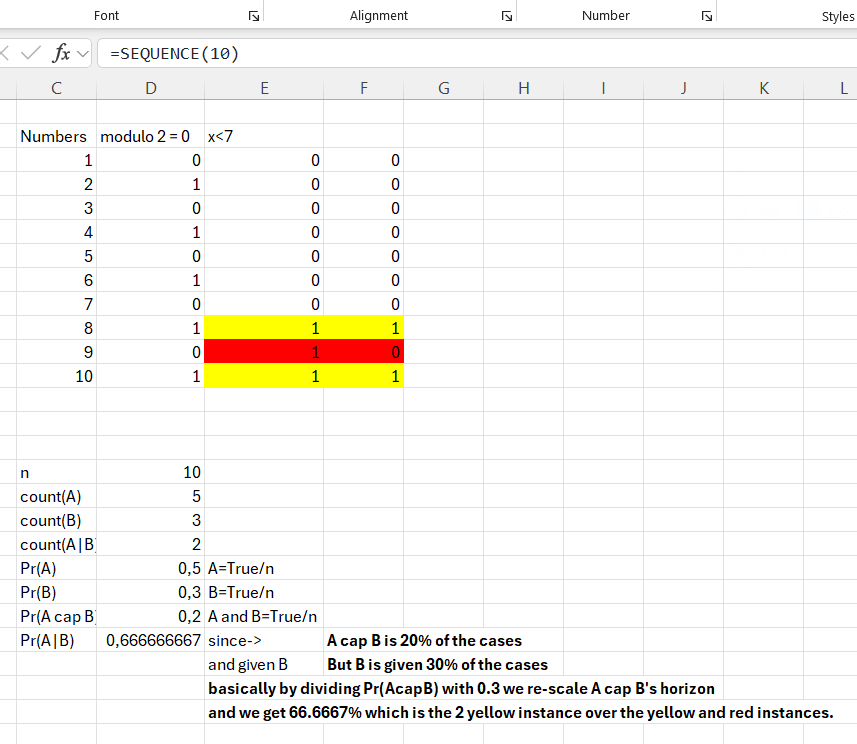

**By the way I ran my above analogies trough Perplexity and it approved my analogies. A simple line I wanted to append: In probability-speak, we’re creating a new universe where our reality is restricted to B, and we’re asking: “What fraction of this new universe does A also occupy?”**





In [12]:
# the probability of rolling 3 on a fair dice is 1/6 because the event of rolling 3 ocurs in one outcome of the six possible
Omega = [1,2,3,4,5,6] #possible outcomes "Omega"
A = 0 #is_3 count set to 0
n = 0
for sides in Omega:
    n += 1 #counts the instances 
    if sides == 3: 
        A += 1
Pr_A = A / n
print(Pr_A) #prints 0.16666666666666666 which is 1/6

n=0 #reset from 6->0. we could use simply a function called prob(case,sides) and output simply Pr(case) and declare n internally but meh...
B = 0
for sides in Omega:
    n += 1 #counts the instances 
    if sides % 2 != 0: #is odd?
        B += 1
Pr_B = B / n
print(Pr_B) #50% chance of the roll is odd -> prints 0.5

### But if B is given ( it's known that the roll is odd ) the event space can be restricted to instances where B = True so
Omega_given_B = [1,3,5]
##and we may re-do the same Pr(A) for loop which will set n = 3, A = 1 -> Pr(A) = 1/3 given B!!

A = 0 
n = 0
for sides in Omega_given_B:
    n += 1 
    if sides == 3: 
        A += 1
Pr_A_if_B = A / n
print(Pr_A_if_B) #prints 0.3333333333333333 which is 1/3

#and note that the below gets to the same result
n = 0
A_and_B = 0
for sides in Omega:#back to Omega
    n += 1 
    if sides == 3 and sides % 2 != 0: 
        A_and_B += 1
Pr_A_and_B = A_and_B / n
Pr_a_given_b = Pr_A_and_B / Pr_B
print(Pr_A_if_B) #prints 0.3333333333333333 which is the same, while we basically just changed the Omega we basis against

0.16666666666666666
0.5
0.3333333333333333
0.3333333333333333


An important application of conditional probability is the Law of Total Probability. THe law states that the total probability of an event can be reconstructed using conditional probabilities under the condition that the probability of the sets being conditioned is equal to 1 ---> meaning they are derived from the same event space $\Omega$. 

Consequently: $$Pr(B) + Pr(B^c) = 1$$
And: $$Pr(A) = Pr(A|B) * Pr(B) + Pr(A|B^c) * Pr(B^c)$$

Where we basically if had a sliced $\Omega$ to two parts, where B = True, and B = False ( $B^c$ ), than via multiplication we re-size both planes to the initial $\Omega$ where both $B$ and $B^c$ were present, and via adding up the probabilities across the new $\Omega$ we may get back to $Pr(A)$ trough it's conditional pieces. For a numeric finite example please see the below Excel screenshot derived from the previous basis.

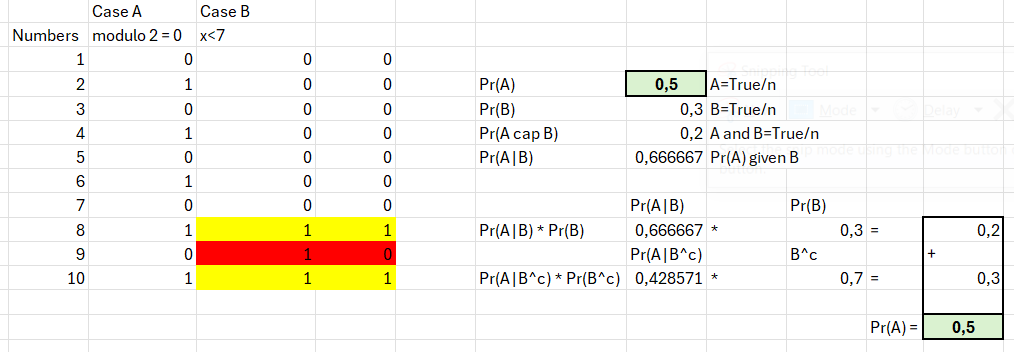


The expression $Pr(A) = Pr(A|B) * Pr(B) + Pr(A|B^c) * Pr(B^c)$ can be expanded to constructing $Pr(A)$ over a plane containing information about multiple further cases from the conditional planes. Imagine $\Omega$ where $$Pr(A) = 0.35$$ and $$Pr(A|B_1) = 0.466$$$$Pr(A|B_2) = 0.409$$ $$Pr(A|B_3) = 0.428$$ $$Pr(A|B_4) = 0.00$$ And let's say it's known that any event fulfilling $A$ is either part of $B_1$, or $B_2$, $B_3$, $B_4$, and there isn't any intersections cross the B cases, meaning $Pr(B_1 \cap B_2 \cap B_3 \cap B_4) = 0.00$. From the $\Omega$'s viewpoint $B_I$'s probability must be known, lets say $Pr(B_i)$:list = [0.3, 0.22, 0.28, 0.2]

$Pr(A)$ can be constructed from the conditional probability over the $B$ cases as per: $$Pr(A) = Pr(A|B_1) * Pr(B_1) + Pr(A|B_2) * Pr(B_2) + Pr(A|B_3) * Pr(B_3) + Pr(A|B_4) * Pr(B_4)$$

which can be expressed as $$Pr(A) = \sum_{i=1}^{4} Pr(A|B_i) \cdot Pr(B_i) $$

In [24]:
Pr_A_over_B_i = [0.466, 0.409, 0.428, 0.00] #prob of A given B_i
Pr_B_i = [0.3, 0.22, 0.28, 0.2] #prob of B_i
Pr_A = 0.0 #declare variable

for i in range(len(Pr_A_over_B_i)):
    Pr_A += Pr_A_over_B_i[i] * Pr_B_i[i]

print(Pr_A) #prints 0.34962 which is slightly off from 0.35 due to lazyness in hardcoded input provision


0.34962


### 
Example: SIFI Failures

**[SIFI](https://www.fsb.org/work-of-the-fsb/market-and-institutional-resilience/global-systemically-important-financial-institutions-g-sifis/): Systematically important financial institutions**

**SIFIs** are a category of designated financial entities that ere deeply connected to large portions of the economy. They are maily banks, complemented by insurers, asset managers, and some central counteprarties. Generally SIFIs are subject to additional regulation and supervision, as the failure of even one of them could lead to major global financial headwinds trough realisation of counterparty risk for the counterparties exposed to these entities. 

Suppose that in any given year $Pr(A) ~= 1\%$ where $A$ denotes the event of at least one SIFI is failing. Suppose firther that if at least 1 SIFI fails meaning the SIFI failor systematic risk gets realised, there is a 30% chance that the number of failing SIFIS are exactily 1,2,3,4 or 5.
In other words, if given $A$, than the probability of the count of SIFIs failing are as follows:
$$Pr(1) = 0.2$$$$Pr(2) = 0.2$$$$Pr(3) = 0.2$$$$Pr(4) = 0.2$$$$Pr(5) = 0.2$$

Let's theoretise, that more than 5 can **not** fail, since by then governments and central banks are forced to intervene.

Given $A$, the probability of two or more SIFIs failing $E$'s probability is:$$Pr(E|A) = Pr(A \cap E)/Pr(A) = Pr(E) / PR(A) = 0.8\% / 1\% = 80\%$$
Here since condition $A$ is a given ($Pr(A) = 100%$), and $E$ is a subset of $A$ meaning $$A \cap E = E, Pr(A \cap E) = Pr(E)$$


This can be rationalised as let's say a random mid size company's default won't make any ripple effects troughout the exonomy, since the effect will be mostly felt trough the live unsettled financial deals (like ongoing loands, unpaid bills and so on...) for the counterparties that had exposure to the entity. For a mid sized company, the effect will be mostly contained as the liquidity buffer of the bank/utility company must absorve the impact. The financial consequences might be severe for the employees or the shareholders, but if the company's size is significantly smaller than it's major conterparties likely there won't be any -- economy level -- meaningful ripple effect. But if we reverse the case it's easy to see that a heavily interconnected company's default may bring forth the defaults of an array of smaller institutions, and damage similar sized SIFIs liquidity buffers to a level that there isn't any absorbsion to the most interconnected SIFI, and the institution must urgently liquidate assets and seek funding on the short
term pools in order to stay afloat. As further defaults occur shortly in case of smaller institutions that both SIFI were exposed to basically the second entity may reach a point where it's at the mercy of government intervention. I kinda oversimlified a lot, but I think this tale captures well why for example the default of MOL Nyrt. persay won't have a measureable failure probability increase to Citigroup (but likely has for Hungarian banks like OTP Nyrt.!) but the other way around is a significant increase for both, and to JP Morgan, as well -- not to mention the poor retail investors of synthetic ETFs where it gonna turn out that Citi was the main underwriter and the Credit Risk was poorly managed! I purpousefully won't name any as primarily the swap counterparty (underwriter) is challenging because issuers often do not publicly disclose specific swap counterparties per ETF on retail-facing databases, and it would be unfair to highlight any w/o backing it up properly.

### Independence
Examining independence is a core concept regarding statistics and econometrics. Two events are independent if the probability of one event's ($A$) occurence does not depend on wheter an other event in question ($B$) occurs obviously. This can be expressed mathematically as: $$Pr(A \cap B) = Pr(A) * Pr(B)$$
meaning that in respect to $A$ intersectom $B$ $Pr(A)$ and $Pr(B)$ are multiplicative. So for example if SIFI failures would be independent events the probability of i institution failing would be: $$i=0 ----> 1-P(A) = P(A^c) = 99\%$$
$$i=1 ----> P(A_1) = 0.98989899\%$$
$$i=2 ----> P(A_2)^2 = 0.01\%$$
$$i=3 ----> P(A_3)^3  = 0.0001\%$$
$$i=4 ----> P(A_4)^4  = 0.000001\%$$
$$i=5 ----> P(A_5)^5  = 0.00000001\%$$

And logically interconnected sizeable defaults would not come in wawes persay, the observed sizeable company failures would me quite linear over theta, which is obviously not the case.$$Pr(A \cap B) = Pr(A) * Pr(B)$$ implies that in case of independent events, the conditional probability of the event is equal to the unconcitional probability of the event meaning:$$Pr(A) = Pr(A) * Pr(B) / Pr(B) = Pr(A \cap B) / Pr(B) = Pr(A|B)$$
and it is also the case for $Pr(B|A) = Pr(B)$

Regarding mutual exclusivity, if $A$ and $B$ are being mutually exclusive, than by knowing $A$ we get significant handicap guessing $B$, consequnelty mutual exclusive relations are not independent. Another way to look at this is that if $Pr(A)$ and $Pr(B)$ are being $>0$ than $$Pr(A \cap B) = Pr(A) * Pr(B) > 0$$ i.e. there must be a positive probability that both occur. However, mutually exclusive events have $Pr(A \cap B) = 0$ and thus cannot be independent.

Independence may be generalised over any number of events leverageing the same principle: the joint probability of the events is the product of the probability of each events. Mathematically, if $A_1$, $A_2$, ..., $A_n$ are independent, than $Pr(A_1\cap A_2\cap ...\cap A_n) = Pr(A_1) * Pr(A_2) * ... * Pr(A_n)$

### Conditional Independence

Like unconditional independence, we can define **conditional independence** relative to another event. Two events ( $A$ ) and ( $B$ ) are **conditionally independent given** ( $C$ ) if:

$$
Pr(A \cap B \mid C) = Pr(A \mid C) \times Pr(B \mid C)
$$

Here, ( $Pr(A \cap B \mid C)$ ) is the probability of both ( $A$ ) and ( $B$ ) occurring, given that ( $C$ ) has occurred.

Note that **conditional independence and unconditional independence are distinct concepts and do not imply each other**. Events can be unconditionally independent, meaning:

$$
Pr(A \cap B) = Pr(A) \times Pr(B)
$$

but dependent when conditioned on another event ( $C$ ), or vice versa.

---

Consider this financial example, although simplified:

- Two assets, denominated in USD, with very different risk characteristics (market risk, counterparty risk, etc.).
- One asset is natively traded in CAD, the other in HUF, but both are quoted in USD somewhere.
- Suppose the probability of a large rapid USD devaluation causing asset blow-ups in any given month is very small, say 0.001%.
- Event ( $A$ ): Asset 1 yields positive returns this month.
- Event ( $B$ ): Asset 2 yields positive returns this month.
- Event ( $C$ ): USD devaluation occurs, causing currency impacts over the next six months such that both assets will almost certainly yield positive returns (due to currency gain overpowering normal asset value changes).

---

**Interpretation:**

- Unconditionally, ( $A$ ) and ( $B$ ) are approximately independent (i.e., ( $ Pr(A \cap B) \approx Pr(A) \times Pr(B) $ )) since their returns come from different markets.
- Conditioning on ( $C$ ) changes the picture: both ( $A$ ) and ( $B$ ) are almost certainly true given USD devaluation, so 

$$
Pr(A \cap B \mid C) \approx Pr(A \mid C) \times Pr(B \mid C) \approx 1 \times 1 = 1
$$

- In reality, even unconditional independence may not be perfect due to common currency effects (e.g., USD fluctuations captured by indices like DXY). These effects introduce slight dependence, but often such dependence is negligible in normal, “peacetime” market conditions.
- Hence, ( $A$ ) and ( $B$ ) may be conditionally highly dependent given ( $C$ ), yet approximately independent unconditionally.

---

I think this example nicely illustrates how conditioning on an event can fundamentally alter the independence relationship in finance, which is critical for risk management and modeling. The key takeaway:

> **Independence may hold generally, but breaks down or changes under specific conditions (events).**



### Bayes' Rule

Bayes' rule proides a method to construct conditional probabilities using other probability measures. It is both a simple application of the definition of conditional probability and an extremely important tool. The formal statment of Bayes' rule is:
$$
Pr(B|A) = \frac{Pr(A|B) \times Pr(B)}{Pr(A)} \text{   <-- The Bayes' rule}
$$
Read as **probability of B given A** equals **probability of A given B** times **probability of B** divided by the **probability of A**.

Jumping back to my analogy about reshaping the "probability plane" via division and multiplication with respect to the given event, Bayes' Rule effectively swaps the conditioning order—from $Pr(X \mid Y)$ to $Pr(Y \mid X)$—by dividing by $Pr(Y)$. This division rescales our probability space $\Omega$, expanding the complement $P(Y^c)$ back to the whole space. Then, multiplying by $P(X)$ restricts the space again to the cases where $X$ occurs. Thus, starting from the perspective of $X$ given $Y$, we reverse the conditioning and reframe the probabilities by considering the complementary and full event spaces in a balanced manner. 

"Proper" explanation is that Bayes' rule is a simple rewriting of the definition of conditional probability, because: $$Pr(A|B) = \frac{Pr(A \cap B) }{Pr(B)} = \text{literally the def of conditional prob}$$
so that $Pr(A \cap B) = Pr(A | B) \times Pr(B)$ can be easily found via multiplying both sides via $Pr(B)$, and reversing the arguments to the other way around gives $Pr(A \cap B) = Pr(B | A) \times Pr(A)$. The next steps are trivial, thus left for your imagination.

Basically it (in the above applied way around) computes "event B given A" from inputs "event A given B", and the (unconditional) probability of event A; and the probability of event B, highlighting the minimum inputs to reverse what's given in probability if it's crafted by construct and not trough examining the underlying dataset. Seems intuitive if you consider that logically $Pr(A)$ is a must for apprehension/reduction to $\Omega$ with respect to $A$ and so on for $B$; and the intersection area itself is a direct mandatory input to examine any conditional probability related to all conditions (events) that are used for it's definition.

---

**Bayes' rule (BR onwards) has many financial and risk management applications.** One example the basis material (red book) provides is: suppose that 10% of fund manager are superstars init. Superstarts have a 20% chance of beating their benchmark by more than 5% / yr, while 'normal' (e.g. the mean, since what's more normie than the mean given only that plane???) fund managers only have 5% chance of doing as such.

Suppose that the new fund manager on the block beat the BM via $7\%$! What's the chance that the new PM is the real deal, oppising to just having a lucky year? So this performance (event, let's call it event "X" -- X factor hehe) of beating the BM via a longshot, which is a given in this case. It's commonly accepted that $Pr(X) = 20%$ if the PM is "SSSuperrr" (event S), thus $Pr(X | S) = 0.2$, while average PMs can have a lucky year $5\%$ of the times, consequently $Pr(X | N) = 0.05$ What's the chance that a new superstar just made the 1st great performance, as we may expect similar years every now and then in the coming years (one in five indicated)? 

Base rates:
- $Pr(S) = 0.1$ (Superstar probability)
- $Pr(N) = 0.9$ Normal probability, construct of $Pr(S^c) + Pr(S) = 1 assuming Pr(N|X) and Pr(S|X) undonditionally was preserved when the (likely frequentist) probabilities were derived.

Applying Bayes' rule:

First, calculate the overall probability of beating the benchmark by more than $5\%$ in a given year ($X$):

$$
Pr(X) = Pr(X|S) \cdot Pr(S) + Pr(X|N) \cdot Pr(N)
$$

Plugging in the numbers:

$$
Pr(X) = 0.2 \times 0.1 + 0.05 \times 0.9 = 0.02 + 0.045 = 0.065 = 6.5\%
$$

Think of it as putting the two probability planes next to each other, since if unconditionality was preserved the basis data weren't mixed, and then getting rid of the dimension of individual classification via multiplying the corresponding probabilities with $Pr(S)$ and $Pr(N)$ leading to an $\Omega$ over which $Pr(X)$ can be drawn.

Now, use Bayes' rule to find the probability that a manager who achieved this feat is a superstar:

$$
Pr(S|X) = \frac{Pr(X|S) \times Pr(S)}{Pr(X)}
$$

Substitute the known values:

$$
Pr(S|X) = \frac{0.2 \times 0.1}{0.065} = \frac{0.02}{0.065} \approx 0.3077
$$

**Interpretation:**  
There is roughly a 30.8% chance that a fund manager who beat the benchmark by more than $5\%$ in their first year is actually a superstar, and a 69.2% chance they're just a normal manager who had a lucky year.

This approach is a practical demonstration of how Bayes' rule helps us update our beliefs about a manager's talent based on observable outcomes, accounting for underlying probabilities and distinguishing skill from luck.

In [29]:
S_X = 0.2
N_X =0.05
pr_s = 0.1
pr_n = 1-pr_s
#pr(S|X) is the question, but pr(X) is a pre-requisite we must construct
pr_x = S_X * pr_s + N_X * pr_n

X_S = S_X * pr_s / pr_x

# alternatively we can "functionalise BR
def bayes_rule(A_given_B, probability_A, probability_B):
    """Calculates B given A e.g. reverses A_given_B leverageing Omega manipulation with Pr(A) and Pr(B)"""
    b_a = A_given_B * probability_A / probability_B
    return(b_a)
print(bayes_rule(S_X, pr_s, pr_x))

0.30769230769230776


So basically think of it as any fresh PM without a track record has a 10% prob of turing up to be great. But having the initial year beating out the BM bigtimes updates the probability to ~ 30.77% knowing and accepting that generally greats beat the BM with higher delta than +0.05 once in 5. Fingers crossed for the promising PM that the macro headwind will allow to cash out on the bonus properly. The concept can be carried over each time a new datapoint becomes known as per:

In [46]:
# Observed annual outcomes: 1 if PM beat BM > 5%, 0 otherwise
upcoming_X = [1, 0, 0, 0, 1]
pr_s = 0.1  # Initial prior
pr_n = 1 - pr_s
S_X = 0.2   # Pr(X|S) - superstar
N_X = 0.05  # Pr(X|N) - normal

# To store the posterior after each new observation
updated_S_X_list = []

for i, observation in enumerate(upcoming_X):
    # Likelihood for observation: Pr(obs|S) and Pr(obs|N)
    if observation == 1:
        like_S = S_X      # Pr(X=1|S)
        like_N = N_X      # Pr(X=1|N)
    else:
        like_S = 1 - S_X  # Pr(X=0|S)
        like_N = 1 - N_X  # Pr(X=0|N)

    # Bayesian updating:
    numerator = like_S * pr_s
    denominator = like_S * pr_s + like_N * pr_n
    posterior_s = numerator / denominator
    updated_S_X_list.append(posterior_s)
    
    # Update prior for next iteration 
    pr_s = posterior_s
    pr_n = 1 - pr_s

# Print each posterior rounded to 3 decimals
for val in updated_S_X_list:
    print(f"{val:.3f}")


0.308
0.272
0.240
0.210
0.515
